In [50]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift, fftfreq
import seaborn as sns

#FILENAME="D:/orlan-10_v2_1chan_dc_removed"
#FILENAME="D:/orlan-10_v2_1chan"
FILENAME="c:/Users/rharrison/Downloads/cw_10MHz_fs-122880000_dur-1.00.iq"
FFT_SIZE = 8192
NFFTS = 8
NSAMPLES = int(FFT_SIZE*NFFTS)  # Use -1 for full file
#RATE_SPS = 5760000
RATE_SPS=122880000
CENTRE_HZ = 895000000

#samples = np.fromfile(FILENAME, dtype=np.float32, count=NSAMPLES*2)
samples = np.fromfile(FILENAME, dtype=np.int16)
iq = (samples[::2] + 1j*samples[1::2])  # convert to IQIQIQ...
print(len(iq))



1228800


In [51]:
print(np.max(np.abs(iq)))
print(np.power(np.average(np.square(np.abs(iq))), 0.5))
print(np.average(iq))

32767.0
32766.389848397444
(2.44140625e-06-8.138020833333334e-07j)


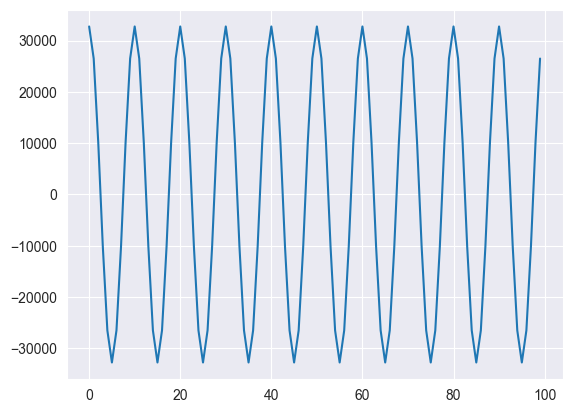

In [52]:
plt.plot(np.real(iq[-100:]))
#plt.specgram(iq, Fs=RATE_SPS, Fc=CENTRE_HZ, scale="dB", NFFT=FFT_SIZE)
#plt.colorbar()

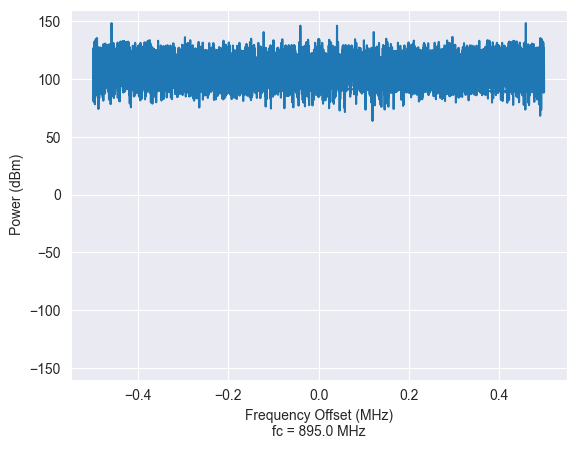

In [13]:

START=3
f=fft(iq[START:START+FFT_SIZE]*np.blackman(FFT_SIZE))
x=fftfreq(FFT_SIZE)
spec=20*np.log10(np.abs(f))

sns.set_style('darkgrid')
fig, ax = plt.subplots()
ax.plot(x, spec)
ax.grid(True)
ax.set_xlabel("Frequency Offset (MHz)\nfc = {} MHz".format(CENTRE_HZ/1e6))
ax.set_ylabel("Power (dBm)")
ax.set_ylim(-160, 160)
plt.show()